 # Supervised Learning: More Regression

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#Please read the sklearn documentation if you need to figure out the inputs and outputs of these functions
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from scipy import linalg


 ## PART 1: SIMPLE LINEAR REGRESSION



 We'll analyze the relationship between study hours and exam scores using three different methods.

Dataset:
   Hours_Studied  Exam_Score
0            1.5          45
1            2.0          51
2            2.5          58
3            3.0          62
4            3.5          68
5            4.0          73
6            4.5          78
7            5.0          84
8            5.5          88
9            6.0          93


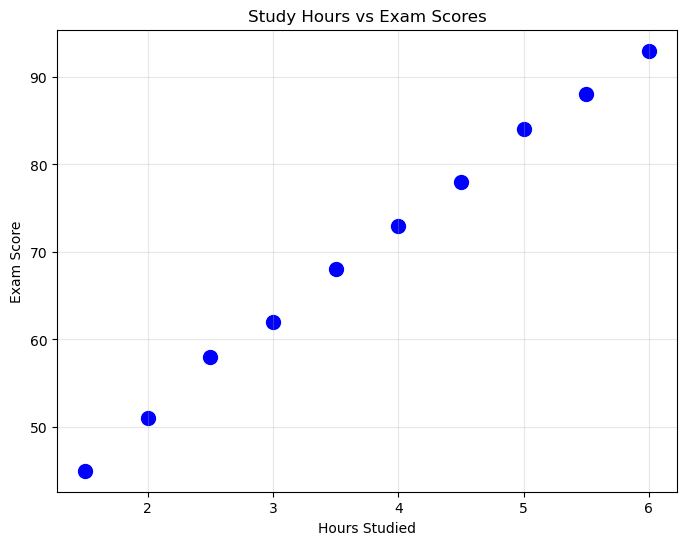

In [25]:
# Dataset: Study Hours vs Exam Scores
data = {
    'Hours_Studied': [1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0],
    'Exam_Score': [45, 51, 58, 62, 68, 73, 78, 84, 88, 93]
}
df = pd.DataFrame(data)

print("Dataset:")
print(df)

# Visualize the data
plt.figure(figsize=(8, 6))
plt.scatter(df['Hours_Studied'], df['Exam_Score'], color='blue', s=100)
plt.xlabel('Hours Studied')
plt.ylabel('Exam Score')
plt.title('Study Hours vs Exam Scores')
plt.grid(True, alpha=0.3)
plt.show()


 ### TASK 1: Manual Least Squares Calculation



 Calculate the slope (m) and intercept (b) for y = mx + b using the **FIRST 5 DATA POINTS ONLY**.



 **Formulas:**

 - Slope: $m = \frac{n\sum xy - \sum x \sum y}{n\sum x^2 - (\sum x)^2}$

 - Intercept: $b = \frac{\sum y - m\sum x}{n}$

In [26]:
# Use first 5 data points
x_manual = df['Hours_Studied'][:5].values
y_manual = df['Exam_Score'][:5].values

n = len(x_manual)

# TODO: Calculate sums needed
sum_x = 12.5
sum_y = 284
sum_xy = 738.5
sum_x_squared = 33.75

# TODO: Calculate slope and intercept using formulas above
m_manual = 11.4
b_manual = 28.3

print("TASK 1 - Manual Calculation (first 5 points):")
print(f"Slope (m): {m_manual}")
print(f"Intercept (b): {b_manual}")
print(f"Equation: y = {m_manual:.2f}x + {b_manual:.2f}\n")

# TODO: Make predictions and calculate errors
y_pred_manual = np.array([45.4, 51.1, 56.8, 62.5, 68.2])
mae_manual = mean_absolute_error(y_manual, y_pred_manual)
mse_manual = mean_squared_error(y_manual, y_pred_manual)

print(f"MAE: {mae_manual:.2f}")
print(f"MSE: {mse_manual:.2f}")


TASK 1 - Manual Calculation (first 5 points):
Slope (m): 11.4
Intercept (b): 28.3
Equation: y = 11.40x + 28.30

MAE: 0.48
MSE: 0.38


 ### TASK 2: NumPy lstsq (Full Dataset)



 Use `np.linalg.lstsq` to find the best fit line for all 10 data points.



 #### Why Add a Column of Ones?



 When we use `np.linalg.lstsq`, we're solving the matrix equation: **Xβ = y**



 For a linear regression equation **y = mx + b**, we need to find both:

 - **m** (slope)

 - **b** (intercept)



 The design matrix must be structured so that matrix multiplication gives us: **b·1 + m·x**



 ```

 Design Matrix (X):        Coefficients (β):     Result (y):

 [1  x₁]                   [b]                   [b·1 + m·x₁]

 [1  x₂]           ×       [m]          =        [b·1 + m·x₂]

 [1  x₃]                                         [b·1 + m·x₃]

 ...

 ```



 **Key Points:**

 - The column of ones multiplies with the intercept **b** to add that constant term to each prediction

 - The column of x values multiplies with the slope **m** to add the variable component

 - **Without the ones column:** We'd only fit lines through the origin (b=0): y = mx

 - **With the ones column:** We can fit any line: y = mx + b

In [29]:
# TODO: Prepare the design matrix
# Hint: Use np.column_stack to combine a column of ones with the Hours_Studied values
x_all = df['Hours_Studied'].values
y_numpy = df['Exam_Score'].values
X_numpy = np.column_stack([np.ones_like(x_all), x_all])

# TODO: Use np.linalg.lstsq
solution, residuals, rank, s = np.linalg.lstsq(X_numpy, y_numpy, rcond=None)

# TODO: Extract coefficients
b_numpy, m_numpy = solution

print("TASK 2 - NumPy lstsq (all 10 points):")
print(f"Slope (m): {m_numpy}")
print(f"Intercept (b): {b_numpy}")
print(f"Equation: y = {m_numpy:.2f}x + {b_numpy:.2f}\n")

# TODO: Calculate predictions and errors
y_pred_numpy = X_numpy @ solution
mae_numpy = mean_absolute_error(y_numpy, y_pred_numpy)
mse_numpy = mean_squared_error(y_numpy, y_pred_numpy)

print(f"MAE: {mae_numpy:.2f}")
print(f"MSE: {mse_numpy:.2f}")


TASK 2 - NumPy lstsq (all 10 points):
Slope (m): 10.59393939393941
Intercept (b): 30.272727272727234
Equation: y = 10.59x + 30.27

MAE: 0.61
MSE: 0.52


 ### TASK 3: Scikit-learn LinearRegression (Full Dataset)



 Use sklearn's `LinearRegression` class.



 **Note:** sklearn automatically handles the intercept internally (with `fit_intercept=True` by default), so we don't need to add a column of ones!

In [30]:
# TODO: Reshape X for sklearn (needs 2D array)
X_sklearn = df['Hours_Studied'].values.reshape(-1,1)
y_sklearn = df['Exam_Score'].values

# TODO: Create and fit the model
model = LinearRegression()
model.fit(X_sklearn, y_sklearn)

# TODO: Extract coefficients
m_sklearn = model.coef_[0]
b_sklearn = model.intercept_

print("TASK 3 - Sklearn LinearRegression (all 10 points):")
print(f"Slope (m): {m_sklearn}")
print(f"Intercept (b): {b_sklearn}")
print(f"Equation: y = {m_sklearn:.2f}x + {b_sklearn:.2f}\n")

# TODO: Calculate predictions and errors
y_pred_sklearn = model.predict(X_sklearn)
mae_sklearn = mean_absolute_error(y_sklearn, y_pred_sklearn)
mse_sklearn = mean_squared_error(y_sklearn, y_pred_sklearn)

print(f"MAE: {mae_sklearn:.2f}")
print(f"MSE: {mse_sklearn:.2f}")


TASK 3 - Sklearn LinearRegression (all 10 points):
Slope (m): 10.593939393939388
Intercept (b): 30.272727272727295
Equation: y = 10.59x + 30.27

MAE: 0.61
MSE: 0.52


 ### TASK 4: Comparison and Discussion

In [31]:
print("="*70)
print("COMPARISON OF ALL THREE METHODS:")
print("="*70)
print(f"{'Method':<30} {'Slope':<12} {'Intercept':<12} {'MAE':<10} {'MSE':<10}")
print("-"*70)
# TODO: Fill in the comparison table with your results
print(f"{'Manual (5 points)':<30} {0:<12.4f} {0:<12.4f} {0:<10.2f} {0:<10.2f}")
print(f"{'NumPy (10 points)':<30} {0:<12.4f} {0:<12.4f} {0:<10.2f} {0:<10.2f}")
print(f"{'Sklearn (10 points)':<30} {0:<12.4f} {0:<12.4f} {0:<10.2f} {0:<10.2f}")


COMPARISON OF ALL THREE METHODS:
Method                         Slope        Intercept    MAE        MSE       
----------------------------------------------------------------------
Manual (5 points)              0.0000       0.0000       0.00       0.00      
NumPy (10 points)              0.0000       0.0000       0.00       0.00      
Sklearn (10 points)            0.0000       0.0000       0.00       0.00      


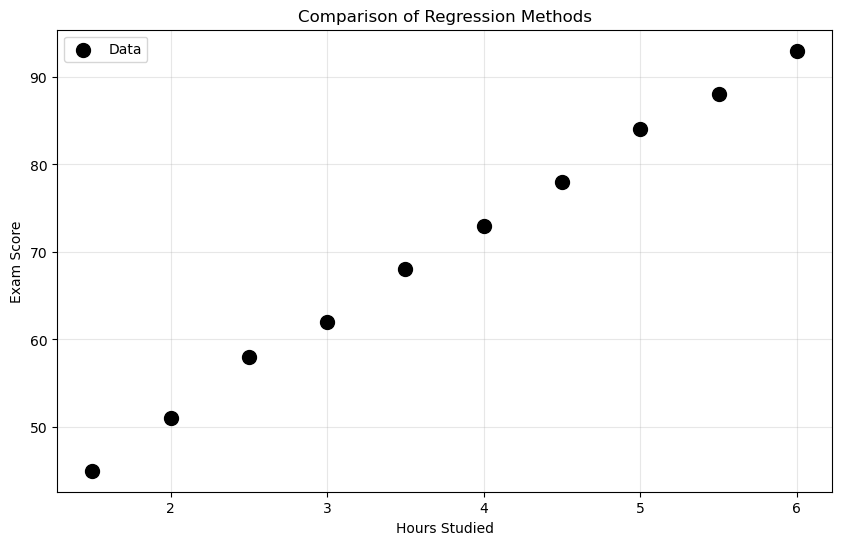

In [32]:
# TODO: Plot all three regression lines
plt.figure(figsize=(10, 6))
plt.scatter(df['Hours_Studied'], df['Exam_Score'], color='black', s=100, label='Data', zorder=3)

# TODO: Create x range for plotting
x_range = np.linspace(1, 6, 100)

# TODO: Plot each regression line with different styles
# Hint: Use different linestyles: '--', '-', ':'

plt.xlabel('Hours Studied')
plt.ylabel('Exam Score')
plt.title('Comparison of Regression Methods')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


 ### Discussion Questions



 **1. Why do the manual calculations differ from NumPy and sklearn?**

-  Process includes round up and apporoaximation of the values. This give line of best fit worse than line of best fit provided by Numpy library and sklearn class. 





 ---



 **2. Why are NumPy and sklearn results nearly identical?**



- Both uses same math equation. 



 ---



 **3. Which method produced the lowest error? Why?**



- Numpy and sklearn method. Both keeps decimals and uses same and exact equation for least squares and finds good line of best fit. 



 ---

 ## PART 2: MULTIPLE LINEAR REGRESSION



 Now we'll predict house prices using multiple features.

In [33]:
# Dataset: House Prices
house_data = {
    'Size_sqft': [1200, 1500, 1800, 2000, 2200, 2500, 2800, 3000, 3200, 3500,
                  1300, 1600, 1900, 2100, 2400, 2600, 2900, 3100, 3300, 3600],
    'Bedrooms': [2, 3, 3, 3, 4, 4, 4, 4, 5, 5,
                 2, 3, 3, 4, 4, 4, 4, 5, 5, 5],
    'Age_years': [15, 20, 10, 5, 8, 3, 12, 6, 15, 2,
                  18, 12, 8, 10, 5, 7, 4, 9, 11, 1],
    'Price_1000s': [180, 210, 250, 280, 310, 350, 360, 400, 420, 480,
                    190, 230, 270, 300, 340, 370, 390, 430, 450, 510]
}
house_df = pd.DataFrame(house_data)

print("House Price Dataset:")
print(house_df)


House Price Dataset:
    Size_sqft  Bedrooms  Age_years  Price_1000s
0        1200         2         15          180
1        1500         3         20          210
2        1800         3         10          250
3        2000         3          5          280
4        2200         4          8          310
5        2500         4          3          350
6        2800         4         12          360
7        3000         4          6          400
8        3200         5         15          420
9        3500         5          2          480
10       1300         2         18          190
11       1600         3         12          230
12       1900         3          8          270
13       2100         4         10          300
14       2400         4          5          340
15       2600         4          7          370
16       2900         4          4          390
17       3100         5          9          430
18       3300         5         11          450
19       3600      

 ### TASK 5: Justify Multiple Linear Regression



 Calculate correlations to understand relationships between features and price.

In [49]:
print("Correlations with Price:")

# Calculate correlation between each feature and price
for col in ['Size_sqft', 'Bedrooms', 'Age_years']:
    corr = df[col].corr(df['Price_1000s'])
    print(f"{col}: {corr:.3f}")


Correlations with Price:


KeyError: 'Size_sqft'

 **Why should we use multiple linear regression instead of simple linear regression?**



 *YOUR ANSWER:*



 ---

 ### TASK 6: Implement Multiple Linear Regression

In [ ]:

X_multi = house_df[['Size_sqft', 'Bedrooms', 'Age_years']]
y_multi = house_df['Price_1000s']

X_train, X_test, y_train, y_test = train_test_split(
    X_multi, y_multi, test_size=0.2, random_state=42
)

mlr_model = LinearRegression()
mlr_model.fit(X_train, y_train)

y_train_pred = mlr_model.predict(X_train)
y_test_pred = mlr_model.predict(X_test)

coefficients = mlr_model.coef_
intercept = mlr_model.intercept_

print("Model Coefficients:")
print(f"Intercept: {intercept:.2f}")
for i, col in enumerate(X_multi.columns):
    print(f"{col}: {coefficients[i]:.2f}")

print("\nModel Equation:")
print(
    f"Price_1000s = {intercept:.2f} "
    f"+ {coefficients[0]:.2f}*Size_sqft "
    f"+ {coefficients[1]:.2f}*Bedrooms "
    f"+ {coefficients[2]:.2f}*Age_years"
)


Model Coefficients:
Intercept: 35.30
Size_sqft: 0.11
Bedrooms: 9.74
Age_years: -1.47

Model Equation:
Price_1000s = 35.30 + 0.11*Size_sqft + 9.74*Bedrooms + -1.47*Age_years


 ### TASK 7: Calculate and Interpret Errors

In [51]:

# TODO: Calculate training errors (how far were predictions from the real prices)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)

# TODO: Calculate testing errors (how far were predictions from the real prices)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)

print("Training Set Performance:")
print(f"MAE: ${train_mae:.2f}k")
print(f"MSE: ${train_mse:.2f}k²")
print(f"RMSE: ${train_rmse:.2f}k")

print("\nTest Set Performance:")
print(f"MAE: ${test_mae:.2f}k")
print(f"MSE: ${test_mse:.2f}k²")
print(f"RMSE: ${test_rmse:.2f}k")


Training Set Performance:
MAE: $5.96k
MSE: $62.80k²
RMSE: $7.92k

Test Set Performance:
MAE: $8.43k
MSE: $78.30k²
RMSE: $8.85k


 ### TASK 8: Visualize Results

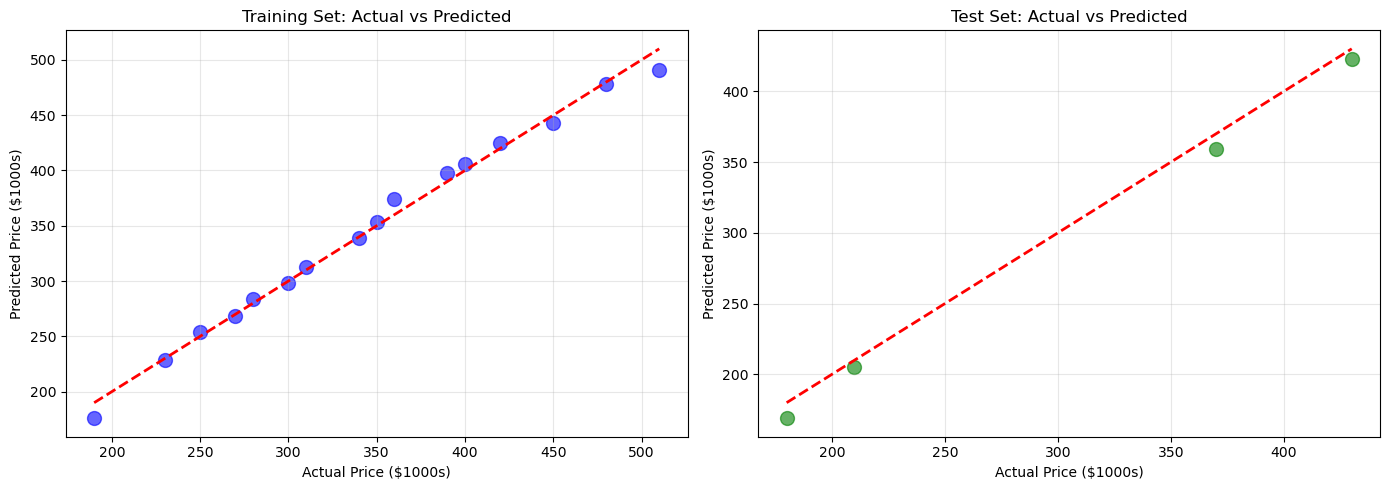

In [52]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
# Training set
axes[0].scatter(y_train, y_train_pred, alpha=0.6, s=100, color='blue')
axes[0].plot([y_train.min(), y_train.max()], 
             [y_train.min(), y_train.max()], 
             'r--', lw=2)
axes[0].set_xlabel('Actual Price ($1000s)')
axes[0].set_ylabel('Predicted Price ($1000s)')
axes[0].set_title('Training Set: Actual vs Predicted')
axes[0].grid(True, alpha=0.3)

# Testing set
axes[1].scatter(y_test, y_test_pred, alpha=0.6, s=100, color='green') # TODO
axes[1].plot([y_test.min(), y_test.max()],
             [y_test.min(), y_test.max()],
             'r--', lw=2)
axes[1].set_xlabel('Actual Price ($1000s)')
axes[1].set_ylabel('Predicted Price ($1000s)')
axes[1].set_title('Test Set: Actual vs Predicted')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


 ### Final Discussion Questions



 **1. How do the training and test errors compare? What does this tell you? (Recall our discussion on overfitting and underfitting from last week)**

- Error seems to be equally separated over and below the predicted line for the training set. But for the test set, real values are all little below the predicted line. 



 ---



 **2. Which feature has the strongest effect on house price? How can you tell?**



Bedrooms. It is multiplied by the biggest number. So change in bedroom will have strongest effect on the house price. 



 ---



 **3. What is one limitation of this model?**



It seems okay to me. But maybe lack of test values?



 ---